# T018 · Automated pipeline for lead optimization

Authors:

- Armin Ariamajd, 2021, CADD seminar 2021, Charité/Freie Universität Berlin
- Melanie Vogel, 2021, CADD seminar 2021, Charité/Freie Universität Berlin
- Andrea Volkamer, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Dominique Sydow, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Corey Taylor, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

In this talktorial, we will learn how to develop an **automated structure-based virtual screening pipeline**. 
The pipeline is **particularly suited for the hit expansion and lead optimization** phases of a drug discovery project, where a promising ligand (i.e. an initial hit or lead compound) needs to be structurally modified in order to improve its binding affinity and selectivity for the target protein. The general architecture of the pipeline can thus be summarized as follows (Figure 1).

* **Input**
    * Target protein structure and a promising ligand (e.g. lead or hit compound), plus specifications of the processes that need to be performed.
      
      
* **Processes**
    * Detection of the most druggable binding site for the given protein structure.
    * Finding derivatives and structural analogs for the ligand. 
    * Using those analogs to perform docking calculations on the selected protein binding site.
    * Analyzing and vizualizing predicted protein–ligand interactions and binding modes for each analog.
    
    
* **Output**
    * New ligand structure(s) optimized for affinity and selectivity.

![Pipeline overview](images/sb_vs_pipeline.png)

*Figure 1*: General architecture of the automated structure-based virtual screening pipeline.

<a id='#Contents-in-Theory'></a>

### Contents in [*Theory*](#theory)

- [Drug design pipeline](#Drug-design-pipeline)
- [Binding site detection](#Binding-site-detection) 
- [Chemical similarity](#Chemical-similarity)
- [Molecular docking](#Molecular-docking)
- [Protein-ligand interactions](#Protein–ligand-interactions)
- [Visual inspection of docking results](#Visual-inspection-of-docking-results)

[comment]: <> (If you change a title, you must update the TOC label, to make cross-references functional on our website!)

<a id='Contents-in-Practical'></a>

### Contents in [*Practical*](#practical)

- [Outline of the virtual screening pipeline](#Outline-of-the-virtual-screening-pipeline)
- [Creating a new project](#Creating-a-new-project)
- [The input data](#The-input-data)
- [Processing the input protein data](#Processing-the-input-protein-data)
- [Processing the input ligand data](#Processing-the-input-ligand-data)
- [Binding site detection](#Binding-site-detection)
- [Ligand similarity search](#Ligand-similarity-search)
- [Molecular docking](#Molecular-docking)
- [Analysis of protein–ligand interactions](#Analysis-of-protein–ligand-interactions)
- [Selection of the best optimized ligand](#Selection-of-the-best-optimized-ligand)
- [Putting the pieces together: A fully automated pipeline](#Putting-all-the-pieces-together:-A-fully-automated-pipeline)

[comment]: <> (If you change a title, you must update the TOC label, to make cross-references functional on our website!)

### References

*Note:* due to the extensive references in each category, details are hidden by default.

<details>

<summary>Click here for a complete list of references </summary>

* TeachOpenCADD teaching platform
    1. Journal article on *TeachOpenCADD* teaching platform for computer-aided drug design: [D. Sydow *et al.*, *J. Cheminform.* **2019**, 11, 29.](https://doi.org/10.1186/s13321-019-0351-x)
    2. [*TeachOpenCADD* website](https://projects.volkamerlab.org/teachopencadd/index.html) at [Volkamer lab](https://volkamerlab.org/)
    3. This talktorial is inspired by the *TeachOpenCADD* talktorials T013-T017
* Drug design pipeline
    4. Book on drug design: [*G. Klebe*, *Drug Design*, Springer, **2013**.](https://doi.org/10.1007/978-3-642-17907-5)
    5. Review article on early stages of drug discovery: [Hughes *et al.*, *Br. J. Pharmacol.* **2011**, 162, 1239-1249.](https://doi.org/10.1111/j.1476-5381.2010.01127.x)
    6. Review article on computational drug design: [Sliwoski *et al.*, *Pharmacol. Rev.* **2014**, 66, 334-395.](https://doi.org/10.1124/pr.112.007336)
    7. Review article on computational drug discovery: [Leelananda *et al.*, *Beilstein J. Org. Chem.* **2016**, 12, 2694-2718.](https://doi.org/10.3762/bjoc.12.267)
    8. Review article on free software for building a virtual screening pipeline: [Glaab, *Brief. Bioinform.* **2016**, 17, 352-366.](https://doi.org/10.1093/bib/bbv037)
    9. Review article on automating drug discovery: [Schneider, *Nat. Rev. Drug Discov.* **2018**, 17, 97-113.](https://doi.org/10.1038/nrd.2017.232)
    10. Review article on structure-based drug discovery: [Batool *et al.*, *Int. J. Mol. Sci.* **2019**, 20, 2783.](https://doi.org/10.3390/ijms20112783)
* Binding site detection and the *DoGSiteScorer* program
    11. Book chapter on prediction and analysis of binding sites: [Volkamer *et al.*, *Applied Chemoinformatics*, Wiley, **2018**, pp. 283-311.](https://doi.org/10.1002/9783527806539.ch6g)
    12. Journal article on binding site and druggability predictions using *DoGSiteScorer*: [Volkamer *et al.*, *J. Chem. Inf. Model.* **2012**, *52*, 360-372.](https://doi.org/10.1021/ci200454v)
    13. Journal article describing the *ProteinsPlus* web-portal: [R. Fahrrolfes *et al.*, *Nucleic Acids Res.* **2017**, 45, W337-W343.](https://doi.org/10.1093/nar/gkx333)
    14. [*ProteinsPlus* website](https://proteins.plus/), and information regarding the usage of its *DoGSiteScorer* [REST-API](https://proteins.plus/help/dogsite_rest)
    15. *TeachOpenCADD* talktorial on binding site detection: [Talktorial T014](https://projects.volkamerlab.org/teachopencadd/talktorials/T014_binding_site_detection.html)
    16. *TeachOpenCADD* talktorial on querying online API web-services: [Talktorial T011](https://projects.volkamerlab.org/teachopencadd/talktorials/T011_query_online_api_webservices.html)
* Chemical similarity and the *PubChem* online database
    17. Review article on molecular similarity in medicinal chemistry: [G. Maggiora *et al.*, *J. Med. Chem.* **2014**, 57, 3186-3204.](https://doi.org/10.1021/jm401411z)
    18. Journal article on extended-connectivity fingerprints: [D. Rogers *et al.*, *J. Chem. Inf. Model.* **2010**, 50, 742-754.](https://doi.org/10.1021/ci100050t)
    19. Journal article describing the latest developments of the *PubChem* web-services: [S. Kim *et al.*, *Nucleic Acids Res.* **2019**, 47, D1102-D1109.](https://doi.org/10.1093/nar/gky1033)
    20. [*PubChem* website](https://pubchem.ncbi.nlm.nih.gov/), and information regarding the usage of its [APIs](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access)
    21. Description of *PubChem*'s [custom substructure fingerprint](https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf) and [*Tanimoto* similarity measure](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1) used in its similarity search engine.  
    22. *TeachOpenCADD* talktorial on compound similarity: [Talktorial T004](https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html)
    23. *TeachOpenCADD* talktorial on data acquisition from *PubChem*: [Talktorial T013](https://projects.volkamerlab.org/teachopencadd/talktorials/T013_query_pubchem.html)
* Molecular docking and the *Smina* program
    24. Review article on molecular docking algorithms: [X. Y. Meng *et al.*, *Curr. Comput. Aided Drug Des.* **2011**, 7, 146-157.](https://doi.org/10.2174/157340911795677602)
    25. Review article on different software used for molecular docking: [N. S. Pagadala *et al.*, *Biophys. Rev.* **2017**, 9, 91-102.](https://doi.org/10.1007/s12551-016-0247-1)
    26. Review article on evaluation and comparison of different docking algorithms: [G. L. Warren *et al*, *J. Med. Chem.* **2006**, 49, 5912-5931.](https://doi.org/10.1021/jm050362n)
    27. Review article on evaluation of ten docking programs on a diverse set of protein-ligand complexes: [Z. Wang *et al.*, *Phys. Chem. Chem. Phys.* **2016**, 18, 12964-12975.](https://doi.org/10.1039/C6CP01555G)
    28. Journal article describing the *Smina* docking program and its scoring function: [D. R. Koes *et al.*, *J. Chem. Inf. Model.* **2013**, 53, 1893-1904.](https://doi.org/10.1021/ci300604z) 
    29. [*OpenBabel* documentation](http://openbabel.org/wiki/Main_Page)
    30. [*Smina* documentation](https://sourceforge.net/projects/smina/)
    31. *TeachOpenCADD* talktorial on protein–ligand docking: [Talktorial T015](https://projects.volkamerlab.org/teachopencadd/talktorials/T015_protein_ligand_docking.html)
    32. Quantifying the chemical beauty of drugs: [G. Bickerton *et al.*, *Nat. Chem* **2012**, 4(2), 90-98.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3524573/)
* Protein-ligand interactions and the *PLIP* program
    33. Review article on protein-ligand interactions: [X. Du *et al.*, *Int. J. Mol. Sci.* **2016**, 17, 144.](https://doi.org/10.3390/ijms17020144)
    34. Journal article analyzing the types and frequencies of different protein-ligand interactions in available protein-ligand complex structures: [R. Ferreira de Freitas *et al.*, *Med. Chem. Commun.* **2017**, 8, 1970-1981.](https://doi.org/10.1039/C7MD00381A)
    35. Journal article describing the *PLIP* algorithm: [S. Salentin *et al.*, *Nucleic Acids Res.* **2015**, 43, W443-447.](https://doi.org/10.1093/nar/gkv315)
    36. [*PLIP* website](https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index)
    37. [*PLIP* documentation](https://github.com/pharmai/plip)
    38. *TeachOpenCADD* talktorial on protein-ligand interactions: [Talktorial T016](https://projects.volkamerlab.org/teachopencadd/talktorials/T016_protein_ligand_interactions.html)
* Visual inspection of docking results and the *NGLView* program
    39. Journal article describing the NGLView program: [H. Nguyen *et al.*, *Bioinformatics* **2018**, 34, 1241-1242.](https://doi.org/10.1093/bioinformatics/btx789)
    40. [*NGLView* documentation](http://nglviewer.org/nglview/latest/api.html)
    41. *TeachOpenCADD* talktorial on advanced NGLView usage: [Talktorial T017](https://projects.volkamerlab.org/teachopencadd/talktorials/T017_advanced_nglview_usage.html)
</details>

<a id='theory'></a>

## Theory

<a id='Drug-design-pipeline'></a>

### [Drug design pipeline](#Contents-in-Theory)

Modern drug discovery and development is a time and resource-intensive process comprised of several phases (Figure 2). The process from initial hit to the pre-clinical phase can take approximately two to four years and cost hundreds of millions of dollars. Causes for failure in the pre-clinical and clinical phases include compound ineffectiveness or unpredictable side-effects. 
Thus, computer-aided drug design pipelines can help to accelerate drug discovery projects, e.g. by prioritizing compounds. 

In this talktorial, we will focus on the **hit-to-lead** and **lead optimization** phases of the pipeline: The goal is to find analogs with improved binding affinities, selectivities, physiochemical and/or pharmacokinetic properties. 

![Drug design pipeline](images/drug_design_pipeline.png)

*Figure 2*: Schematic representation of the main phases in a modern drug discovery pipeline. Figure adapted from: [*Expert Opin. Drug. Discov.* **2010**, 5, 1039-1045.](https://doi.org/10.1517/17460441.2010.515583)

<details>
<summary>Click here for details about the automated drug design pipeline</summary>
Given a target protein structure and a hit or lead compound, instead of synthesizing a variety of analogs and testing their potency in laboratory screening experiments, we will obtain these analogs via a similarity-search algorithm. We can then calculate their physiochemical properties and select the best analogs in order to perform docking calculations. The result of these calculations is an estimation of the affinity for each compound against the target protein. Analogs with the highest calculated binding affinities will be selected and we visualize their predicted binding modes to choose those compounds that exhibit optimal protein-ligand interactions. This can result in enhanced selectivities for the target protein as well.
</details>

<a id='Binding-site-detection'></a>

### [Binding site detection ](#Contents-in-Theory)

Binding sites, also known as binding pockets, are cavities in the 3-dimensional structure of a protein (Figure 3). These are mostly found on the surface of the protein structure, and are the main regions through which the protein interacts with other entities. For a favorable interaction, the two binding partners need to have complementary steric and electronic properties (cf. lock-and-key principle, induced-fit model). Therefore, attractive intermolecular interactions between the residues of the binding pocket and, for example, a small-molecule ligand is one of the key factors for molecular recognition, and thus, a ligand's potency.

![Binding site detection](images/binding_site.png)

*Figure 3*: Crystal structure of a protein (EGFR; PDB-code: 3W32) with a co-crystallized ligand in its main (orthosteric) binding site. The protein's surface is shown in gray. The binding site is colored blue. The ligand's carbon atoms are colored green. Figure created using *PyMol*.

#### Binding site detection with *DoGSiteScorer*

For binding site detection, we will use the _DoGSiteScorer_ functionality of the [*ProteinsPlus*](https://proteins.plus/) webserver. _DoGSiteScorer_ uses a **geometry- and grid-based detection** algorithm where the protein is embedded into a Cartesian 3D-grid and each grid point is labeled as either free or occupied depending on whether it lies within the van-der-Waals radius of a protein atom. Subsequently, an edge-detection algorithm from image processing, called **Difference of Gaussians** (DoG), is used to identify protrusions on the protein surface. In doing so, cavities on the protein surface that can accommodate a spherical object are identified per grid point. Finally, cavities on neighboring grid-points are clustered together based on specific cut-off criteria, resulting in defined sub-pockets that are merged into pockets (Figure 4). 

<details>
<summary>Click here for additional information on how the DoGSiteScorer algorithm works</summary>
For each (sub-)pocket, the algorithm then calculates several descriptors, e.g. volume, surface area, depth, hydrophobicity, number of hydrogen-bond donors/acceptors and amino acid count, as well as two druggability estimates: 

1. a _simple druggability score_, based on a linear combination of the three descriptors describing volume, hydrophobicity and enclosure.
2. another score is calculated by incorporating a subset of meaningful descriptors into a support vector machine (SVM) model, trained and tested on the freely available (non-redundant) druggability dataset consisting of 1069 targets.
    
Both calculated druggability scores are between 0 and 1, where a higher score corresponds to a more druggable binding site. Using these calculated descriptors and druggability estimates, we can then choose the most suitable pocket depending on the specifics of the project in hand.

</details>

![Binding site detection with DoGSiteScorer](images/dogsitescorer.png)

*Figure 4*: Visualization of some of the sub-pockets (colored meshed volumes) for the EGFR protein (PDB-code: 3W32) as detected by the *DoGSiteScorer* web-service. The co-crystallized ligand is mostly contained in the purple sub-pocket. Figure taken from: [DoGSiteScorer website](http://proteinsplus.zbh.uni-hamburg.de/#dogsite).

For more details see [Talktorial T014](https://projects.volkamerlab.org/teachopencadd/talktorials/T014_binding_site_detection.html) on binding site detection and the *DoGSiteScorer*.

<a id='Chemical-similarity'></a>

### [Chemical similarity](#Contents-in-Theory)

In the hit expansion and lead optimization steps of an experimental drug design pipeline, several derivatives of the initial hit/lead compound are chemically synthesized. 
Following the similarity hypothesis, analogues can also be computationally obtained by performing a **similarity search** on databases of existing chemical compounds. To do so, a numerical description of compounds is needed (Figure 5), as well as a similarity measure to compare them. One common example are molecular fingerprint descriptors together with the Tanimoto coefficient.

<details>
<summary>Click here for additional information on chemical descriptors</summary>
    
The simplest descriptors for a molecule are the so-called **1D-descriptors**, which are scalar values corresponding to a certain property of the molecule.
Some examples include: Molecular weight, octanol-water partition coefficient (logP) or total polar surface area (TPSA).

However, these descriptors usually do not contain enough information to assess the structural and chemical similarity of two compounds. For this purpose, **2D-descriptors**, also known as **molecular fingerprints**, are used. These descriptors are vectors that can represent a specific molecular structure in much more detail using a set of scalars. 

A variety of algorithms are available for generation of 2D-descriptors from chemical structures, e.g. ***MACCS*** **structural keys** and ***ECFP/Morgan*** **fingerprints**. Generally, these algorithms work by extracting a set of specific features from the structure (Figure 5), generating a numerical representation for each feature, and using these representations to produce either a bit-vector where each component is a bit defining the presence/absence of a particular feature (i.e. Morgan fingerprints), or a count-vector where each value corresponds to the number of times a specific feature is present in the structure (i.e. MACCS keys). 
    
Moreover, there are other scoring functions to calculate the similarity between two molecules based on their 2D-descriptors. These include ***Euclidean***-**distance** and ***Manhattan***-**distance** calculations, where both presence and absence of attributes are considered, or ***Tanimoto*** and ***Dice*** coefficients, which only consider the presence of attributes. It should be noted that there is no single correct approach to calculate molecular similarity, and depending on the purpose of the project different descriptors and metrics may be used, which can generally result in vastly different similarity scores.    
</details>

![Chemical similarity](images/chemical_descriptors.png)

*Figure 5*: A simplified depiction of the process of calculating the similarity between two compounds. First, the structure of each compound is encoded into a molecular fingerprint bit-vector, where each bit corresponds to the presence or absence of a particular fragment in the structure, for example. These fingerprints can then be compared using different similarity metrics in order to calculate a similarity score.

See [Talktorial T004](https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html) to become more familiar with encoding and comparison of molecular similarity measures.

#### PubChem database

In this talktorial, we will use the <a href="https://pubchem.ncbi.nlm.nih.gov/">*PubChem*</a> web-services for performing the similarity search on the input ligand. *PubChem*, which is maintained by the <a href="https://www.ncbi.nlm.nih.gov/">U.S. National Center for Biotechnology Information (NCBI)</a> contains an open database with 110 million chemical compounds and their properties (e.g. identifiers, physiochemical properties, biological activities etc.), which can be accessed through both a web-based interface, and several different web-service Application Programming Interfaces (*API*s). 

Here, we will use their <a href="https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access">PUG-REST API</a>. It also allows for directly performing similarity searches on the database, using a <a href="https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf">custom substructure fingerprint</a> as the 2D-descriptor, and the <a href="https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1">*Tanimoto* similarity measure</a> as the metric. Therefore, by submitting a compound's identifier (e.g. SMILES, CID, InChI etc.) to the *PubChem*'s API, providing a similarity threshold and the desired number of maximum results, a certain number of compounds within the given similarity threshold can be obtained.

For more details on data acquisition from *PubChem*, see [Talktorial T013](https://projects.volkamerlab.org/teachopencadd/talktorials/T013_query_pubchem.html).

<a id='Molecular-docking'></a>

### [Molecular docking](#Contents-in-Theory)

After defining an appropriate binding site in the target protein and obtaining a set of analogs for the ligand of interest, the next step is to assess the suitability of each analog in terms of its position in the binding site, otherwise known as the binding mode, and its estimated fit or binding affinity. This can be done using a molecular docking algorithm. 

The process works by **sampling the ligand's conformational space** in the protein's binding site and evaluating the energetics of protein-ligand interactions for each generated conformation using a **scoring function**. The **binding affinity** of each docking pose is then estimated to determine the energetically most-favorable **binding modes**. Examples for docking binding modes are shown in Figure 6.

<details>
<summary>Click here for additional information on the docking process </summary> 
Most docking programs require some preparation steps of the protein and ligand structures. For example: 

- Hydrogen atoms that are usually absent in crystal structures should be added to the protein. 
- The correct protonation state for each atom should be calculated based on a given pH value, usually physiological pH (7.4). 
- Partial charges should be assigned to all atoms. 
- For ligands, which are usually inputted via text-based representation (e.g. SMILES), a low-energy conformer should also be generated. It is then used as the starting point in the conformational sampling process. 

However, most of these calculations have limitations on their accuracy. Many are either computationally expensive, such as is the case where the lowest-energy conformation of the ligand is calculated, or require information that is not available beforehand or ambiguous, such as protonation states for the protein and ligand. In many cases, the docking pose with the highest estimated binding affinity does not correspond to the experimentally determined binding mode of the ligand (Figure 6). These limitations, along with others inherent in all force-field based methods do affect the accuracy of the estimates from docking results. 
</details>

![Example docking poses](images/docking_poses.png)

*Figure 6*: An example of two generated docking poses (red) in a re-docking experiment performed using the *Smina* program, superimposed over the corresponding protein structure (EGFR; PDB-code: 3W32) and the co-crystallized ligand in its native binding mode (green). While the generated docking pose shown on the left is calculated to have a higher binding affinity, it also displays a higher distance-RMSD to the native docking pose. Figure created using *PyMol*.

In this talktorial, we will use the [*Smina*](https://sourceforge.net/projects/smina/) docking program, which is an open-source fork of the docking program [*Autodock Vina*](http://vina.scripps.edu/). *Smina* is open-source software and has a focus on improved scoring functions and energetic minimization. It uses a custom empirical scoring function as default but also supports user-parameterized scoring functions as well. In addition, in order to prepare the protein and ligand structures for the docking experiment (as described above), we will also use the [*Pybel*](https://github.com/pybel/pybel) package - a Python package for the [*OpenBabel*](http://openbabel.org/wiki/Main_Page) program.

For more details on protein–ligand docking, see [Talktorial T015](https://projects.volkamerlab.org/teachopencadd/talktorials/T015_protein_ligand_docking.html).

<a id='Protein–ligand-interactions'></a>

### [Protein–ligand interactions](#Contents-in-Theory)

The number and type of non-covalent intermolecular interactions between the protein and the ligand are determining factors of the ligand's potency. The overall affinity of a ligand is an intricate balance of several types of interactions which are mostly governed by steric and electronic properties of the interacting partners.

While the most common of these interactions are estimated by the scoring function of the docking algorithm, it is useful to explicitly analyze them in the binding modes generated by the docking calculation. This information can be used to validate the calculated binding poses or to narrow the choice of an optimal lead compound in terms of selectivity, e.g. by choosing those derivatives that exhibit interactions with specific mutated or non-conserved residues in the protein. 

In this talktorial, we will use the [*Protein–Ligand Interaction Profiler (PLIP)*](https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index), an open-source program with both a webserver and an available package for Python. *PLIP* can analyze protein-ligand interactions in any given protein-ligand complex structure by selecting pairs of atoms - one from the protein and one from the ligand - that lie within a pre-defined distance cut-off value. It then identifies the potential interactions between selected pairs based on electronic and geometric considerations. 

Thus, a set of information is outputted for each detected interactions including the interaction type, the atoms involved in each of the ligand and protein and other properties specific to each interaction type. The results can then be used to visualize the protein-ligand interactions (Figure 7) or to analyze them algorithmically.

![Protein-ligand interactions in 3D](images/interaction_pattern.png)  
 
*Figure 7*: Visualization of the protein-ligand interactions in a protein-ligand complex structure (EGFR; PDB-code: 3W32) detected by the *PLIP* web-service. From the protein, only the interacting residues are shown with their protein and ligand carbon atoms colored blue and brown, respectively. Hydrophobic interactions are shown as gray dashed lines. Hydrogen bonds are depicted as blue lines. $\pi$-stacking interactions are shown as green dashed lines. Halogen bonds are displayed using cyan lines. Figure taken from: [PLIP website](https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index).

For more details on protein-ligand interactions, see [Talktorial T016](https://projects.volkamerlab.org/teachopencadd/talktorials/T016_protein_ligand_interactions.html).

<a id='Visual-inspection-of-docking-results'></a>

### [Visual inspection of docking results](#Contents-in-Theory)

Visual inspection of the calculated docking poses and their corresponding protein-ligand interactions is inevitable. Some of the most common considerations when selecting a binding mode ares:

- Similarity to experimentally observed binding modes in available crystal structures of the target protein
- Steric and electronic complementarity
- Polar functional groups in the ligand have an interaction partner in the protein
- No solvent-exposed hydrophobic moieties in the ligand
- Assessment of the displacement of or interactions with water molecules in the pocket
- Steric strain induced by the ligand binding

However, since manual inspection is a time-consuming process, it can only be performed on a small subset of calculated docking poses. These are usually the poses with the highest calculated binding affinities. To visualize the results, we use [*NGLView*](https://nglviewer.org/#nglview), a Jupyter widget using a Python wrapper for the Javascript-based *NGL* library. This allows for visualization of structures within a Jupyter notebook in an interactive 3D view.

For more details on advanced *NGLView* usage, see [Talktorial T017](https://projects.volkamerlab.org/teachopencadd/talktorials/T017_advanced_nglview_usage.html).

<a id='practical'></a>

## Practical

In this section, we will implement and demonstrate the automated structure-based virtual screening pipeline step by step.

First, the absolute path for loading and saving the data is set.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

HERE = Path(_dh[-1])
DATA = HERE / "data"

**Due to maintenance reasons, we are using frozen datasets at two steps of the notebook that would otherwise return slightly different results everytime this notebook is run.**

- *PubChem* similarity search: Since the *PubChem* database is constantly updated, the similarity search will return different results. We use a frozen set of analogs to ensure stable results in this notebook.
- Docking starting structures: Everytime we are preparing the PDBQT files for docking, we differ slightly (see [this discussion](https://github.com/openbabel/openbabel/issues/1934)). We use a frozen set of PDBQT files to ensure stable results in this notebook.

If you want to run this notebook without frozen datasets, please set `USE_FROZEN_DATASETS` to `False`.

In [3]:
# If you want to unfreeze the datasets, please set `USE_FROZEN_DATASETS` to False
USE_FROZEN_DATASETS = True

In [4]:
from utils import FrozenData

frozen_data_project1 = FrozenData("Project1", USE_FROZEN_DATASETS)
frozen_data_project2 = FrozenData("Project2", USE_FROZEN_DATASETS)

<a id='Outline-of-the-virtual-screening-pipeline'></a>

### [Outline of the virtual screening pipeline](#Contents-in-Practical)

As this is a relatively large project with several different functionalities, it is a good practice to use **classes**. Classes can contain **methods** or even other classes (sub-classes) and are very useful for organizing a project by form and function. In doing so, the code will be well-structured and easier to follow, maintain, reuse, and expand upon. 

<details>

<summary>Click here for additional information on the use of classes, methods, attributes and objects in Object-Oriented Programming</summary> 

We are going to use classes and organize them into a processing sequence analogous to a pipeline. When a class or method performs an operation on a piece of data, a new representation of that data is created. This is known as an **object** and the process of creating it is known as **instantiation**.  

An object is a versatile representation as it can contain data or instructions, known as as **attributes**. The object will be passed between points in the pipeline for further use or processing depending on what type of object it is or which class or method created it. Objects can be augmented with additional attributes or abilities and are even used to create new objects, gaining all of or a sub-set of its abilities (**inheritance**). This is as opposed to older languages where once data was read in by a program, it could not be altered and instructions for manipulating data were generally run in strict sequence. Objects can also be reused whereas, in older languages, once the data is processed, if it was not saved to disk, it was discarded. This is the essence of all **Object-Oriented Programming (OOP)** languages, which Python is.
    
</details>

As a first step, we will define a container class `LeadOptimizationPipeline` with only a single instance attribute called `name`. For the rest of the talktorial, we will use the **eight main classes** shown below (Figure 8), instantiate them with the necessary input data, and assign that instance to our created project. 

![Main classes](images/lead_optimization_pipeline_classes.png)

*Figure 8*: Main classes used in the pipeline of this talktorial.

Although it is not necessary that the main classes are created in a specific order, you will see as we go that we can often reuse the functionality from one created class in another. Thus, a natural order forms (`Specs` followed by `Protein` followed by `Ligand`, etc.). As the code behind each class contains dozens of lines, we will not present all of it in this notebook directly. These classes are stored in a separate folder (`utils`) and will be imported and used as necessary. Feel free to peruse those files if you would like to know more about the exact operations that are being done when the code is executed. It bears pointing out that one is not limited to the methods implemented for this talktorial; one of the key advantages of writing a pipeline in this manner is that you can easily add more functionality yourself.

Furthermore, most of the above classes rely on several helper modules (e.g. `IO`, `PDB`, `PubChem`, etc.), which contain functionalities to assist in the operations of the main classes, such as retrieving data or implementing the software needed to perform a task. These helper modules are stored in a separate folder as well (`utils/helpers`).

<details>

<summary>Click here for additional information on helper modules that are implemented in the Talktorial</summary> 

**The `Consts` module**

To allow for a more robust pipeline, we define a data class called `Consts` which contains all the possible keywords in the input dataframe, such as the column names, index names, subject names, properties, etc. These keywords are all stored in their respective sub-classes as **enumerations**, so that the rest of the code needs only to refer to the enumeration names and not their values.

<details>
<summary> Click here for additional information on dealing with input data</summary> 

In a *quick-and-dirty* approach, the input parameters would be called - whenever needed in the code - using their respective index and column names in the dataframe. However, this often leads to code that is not easily maintainable or expandable. A small change to the input data, such as renaming a column, will require the whole code to be revised accordingly. A more efficient approach is to first internalize all the input data in a data class so that the rest of the program needs only to communicate with this class and not the input dataframe directly.

There are several advantages to this approach. First, any error in the input data is recognized in the beginning before any process is performed. In subsequent versions of the program, any change in the input data needs only to be accounted for in this class and not in the entire code. Finally, the class gives an overview of all the possible inputs for the program so you won't need to remember them. 
</details>
    
**The `IO` module**

To be able to read and process the input data, we defined a helper module called `IO`. This contains all the necessary functions for handling the input and output data. e.g. creating a dataframe from the input CSV file, extracting specific information from the dataframe, or creating folders for storing the output data. 

**The `PDB` and the `NGLView` modules**

These modules contain all the necessary functions for handling protein data by processing PDB files, and for visualizing protein-related data, respectively. They allow us to display and manipulate the protein structure and later the protein binding site, as well as ligand poses and their corresponding protein-ligand interactions obtained after the docking experiments.

**The `PubChem` module**

The `PubChem` module contains all the necessary functions to use the *PubChem* web-service APIs. This is how we can obtain new information on ligands such as other identifiers (e.g. IUPAC name, SMILES), physiochemical properties and, descriptions etc. *PubChem* has also the ability to perform similarity searches on a given ligand, which we will use in the `LigandSimilaritySearch` class of the pipeline. 

**The `RDKit` module**

This moduile uses the `RDKit` Python library to implement some useful functionalities for ligands, such as 

* calculating properties and descriptors, 
* generating images or SDF files
* or performing similarity searches. 

We can retrieve data about a molecule such as molecular weight, partition coefficients or number of hydrogen-bond acceptors/donors. These properties will also be used to calculate several drug-likeness scores. Examples include the Lipinski rule of 5, and the quantitative estimate of drug-likeness (QED). 

Other useful functionalities that will be imported here include visualization of molecular structures and saving molecules to file, either as an image or a Structure-Data File (SDF). A function is also defined to calculate the similarity between two molecules based on the Dice similarity metric using circular (Morgan) fingerprints. This will be used later to assess the similarity of each analog of the ligand found by the similarity search performed using *PubChem*. 

**The `DoGSiteScorer` module**

This module implements the [API](https://proteins.plus/help/dogsite_rest) of the *DoGSiteScorer* web-service, which can be used to submit binding site detection jobs, either 

* by providing the PDB-code of protein structure, 
* or by uploading its PDB file. 

It also processes the binding site detection results, creating a table of all detected pockets and sub-pockets and their corresponding descriptors. For each detected (sub-)pocket, 

* a PDB file is provided
* and a [CCP4](https://www.ccp4.ac.uk/html/maplib.html#description) map file is generated. 

These are downloaded and used to define the coordinates of the (sub-)pocket needed for the docking calculation and visualization. The function `select_best_pocket` is also defined which provides several methods for selecting the most suitable binding site.


**The `OBabel` module**

Here, the [Pybel](https://github.com/pybel/pybel) package of the [OpenBabel](http://openbabel.org/wiki/Main_Page) program is used in order to implement the functions needed to prepare the protein and the ligand analogs for docking.

**The `Smina` module**

For docking, we are going to use the [Smina](https://sourceforge.net/projects/smina/) program. It does not have a Python-API but we can simply communicate with the program via shell commands. Contained within the module is a function to read the output log of the program and extract useful data. 

**The `PLIP` module**

The [PLIP](https://github.com/pharmai/plip) package is used to implement the functions needed to analyze non-covalent protein-ligand interactions in the generated docking poses. In addition, several functions are defined to filter the docking poses based on desirable interactions with specific residues of the protein.

</details>

Example demonstrations of each helper module are placed at the end of the talktorial under <a href="#supp">Supplementary Information</a>.

<a id='Creating-a-new-project'></a>

### [Creating a new project](#Contents-in-Practical)

To begin with a new project, we first create an instance of the `LeadOptimizationPipeline` class, which we will call `project1`. For demonstration purposes, we have chosen the same protein and ligand illustrated in *Figure 1*, i.e. the epidermal growth factor receptor ([EGFR](https://www.uniprot.org/uniprot/P00533)) as our target protein, and the ligand with the ChEMBL-ID [CHEMBL328216](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL328216/). Thus, we will simply name our lead optimization project `Project1_EGFR_CHEMBL328216`:

In [5]:
from utils import LeadOptimizationPipeline

project1 = LeadOptimizationPipeline(project_name="Project1_EGFR_CHEMBL328216")

The instance attribute `name` can then be accessed as follows:

In [6]:
project1.name
# NBVAL_CHECK_OUTPUT

'Project1_EGFR_CHEMBL328216'

<a id='The-input-data'></a>

### [The input data](#Contents-in-Practical)

#### Entering the input data

The first thing the pipeline should be able to do is to read and process the input data for the protein and the ligand, as well as specifications for the processes that need to be performed on them. As this involves many parameters, it is best to use a file to store all the necessary input data for a specific project. Thus, for each project the user only has to fill in a template input file with all the necessary data and then specify the filepath of the input data when running the program. 

Here, we use a template CSV file, which is stored in the folder `data`, under the name `InputData_Template`. For demonstration purposes, we can open the empty template file here to have a closer look.

We see that the table contains four columns:

* **Subject**: Specifies the subject of the input parameter. We need to input a **Protein**, a **Ligand** and a set of specifications corresponding to each part of the pipeline, namely **Binding Site**, **Ligand Similarity Search**, **Docking**, **Interaction Analysis** and **Optimized Ligand**.


* **Property**: Specifies a specific property of the **Subject**. Required properties are marked with an asterisk. All other properties are optional (i.e. have default values set in the program), and some are dependent on other properties. For example, If the **Binding Site Definition Method** is not `"coordinates"`, then there is no need to enter the value for the **Binding Site Coordinates** row. 


* **Value**: The only column that should be filled by the user. Each value corresponds to a specific **Property** of a specific **Subject**.


* **Description**: Provides a short description as to what input data is expected in each specific row, and when it should be provided.

In order to read and process the input file we will use the `pandas` package, which can directly read CSV files and transform them into a `DataFrame` object – the `pandas` equivalent of a table in a database. 

In [7]:
import pandas as pd  # for creating dataframes and handling data

pd.read_csv(DATA / f"InputData_Template.csv")
# NBVAL_CHECK_OUTPUT

,Subject,Property,Value,Description
0,Protein,Input Type*,NaN,"Allowed: 'pdb_code', 'pdb_filepath'."
1,Protein,Input Value*,NaN,Either a valid PDB-code or a local filepath to...
2,Ligand,Input Type*,NaN,"Allowed: 'smiles', 'cid', 'inchi', 'inchikey',..."
3,Ligand,Input Value*,NaN,Identifier value corresponding to given input ...
4,Binding Site,Definition Method,NaN,Definition method for the protein binding site...
5,Binding Site,Coordinates,NaN,"If Definition Method is 'coordinates', enter t..."
6,Binding Site,Ligand,NaN,"If the Definition Method is 'ligand', enter th..."
7,Binding Site,Detection Method,NaN,"If the Definition Method is 'detection', enter..."
8,Binding Site,Protein Chain-ID,NaN,"If the Definition Method is 'detection', optio..."
9,Binding Site,Protein Ligand-ID,NaN,"If the Definition Method is 'detection', optio..."


#### Reading and processing the input data

The `Specs` class of the pipeline was created using the functionalities in the `IO` helper module. This class is responsible for automatically reading and internalizing all the input data contained in the input file. It also contains some logic e.g. to check if all the necessary data for a specific project have been inputted by the user, and to fill in some default values if needed. Furthermore, it creates the necessary folders for the output data, and stores their paths.

We can now instantiate the `Specs` class and feed the data it requires. This is done by specifying the filepath of the input CSV file and the output path for storing the output data. As discussed, we will assign the created instance to our project, just to have everything organized in one place.

In [8]:
from utils import Specs

project1.Specs = Specs(
    input_data_filepath=DATA / "PipelineInputData_Project1.csv",
    output_data_root_folder_path=DATA / "Outputs/" / project1.name,
)

All the available data in the input CSV file of our project are now contained within the project's `Specs` instance. These can be accessed using the corresponding **instance attributes**.

<details>

<summary> Click here for additional information on instance attributes</summary> 

An advantage of storing the data as instance attributes and assigning them to `project1` is that everywhere in the code we can directly see all the project's data and know how to access them. Just write `project1.` and press the *tab* button. Code completion will then display a list of all available options to choose from. As we import more classes and add attributes later (`Protein`, `Ligand`, etc.), if you repeat this process, you will see more attributes have been added.
</details>

Some examples of attributes that have been added by instantiation of the `Specs` class can be seen below:

In [9]:
project1.Specs.Protein.input_value
# NBVAL_CHECK_OUTPUT

'3W32'

In [10]:
project1.Specs.Ligand.input_value
# NBVAL_CHECK_OUTPUT

'Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N'

And it is also possible to see the raw input data in its entirety:

In [11]:
project1.Specs.RawData.all_data
# NBVAL_CHECK_OUTPUT

Value
Subject                  Property                                                                                             
Protein                  Input Type*                                                                                  pdb_code
                         Input Value*                                                                                     3W32
Ligand                   Input Type*                                                                                    smiles
                         Input Value*                                                          Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N
Binding Site             Definition Method                                                                           detection
                         Coordinates                                                                                       NaN
                         Ligand                                                                                            NaN
                         Detection Method                                                                        dogsitescorer
                         Protein Chain-ID                                                                                  NaN
                         Protein Ligand-ID                                                                                 NaN
                         Selection Method                                                                              sorting
                         Selection Criteria                                                                   lig_cov, poc_cov
Ligand Similarity Search Search Engine                                                                                 pubchem
                         Minumum Similarity [%]                                                                             70
                         Maximum Number of Results                                                                          30
                         Maximum Number of Most Drug-Like Analogs to Con...                                                 20
Docking                  Program                                                                                         smina
                         Number of Docking Poses per Ligand                                                                  5
                         Exhaustiveness                                                                                     10
                         Random Seed                                                                                      1111
Interaction Analysis     Program                                                                                          plip
Optimized Ligand         Number of Results                                                                                   1
                         Selection Method                                                                              sorting
                         Selection Criteria                                  affinity, total_num_interactions, drug_score_t...

<a id='Processing-the-input-protein-data'></a>

### [Processing the input protein data](#Contents-in-Practical)

The `Protein` class of the pipeline can be instantiated by inputting the protein data of the project, namely:

* Protein input type
* Corresponding input value
* Output path for storing the protein data. 

It then creates a *Protein* object with extended attributes and methods, using the functionalities defined in the `PDB` and `NGLView` helper modules, .

In [ ]:
from utils import Protein

project1.Protein = Protein(
    identifier_type=project1.Specs.Protein.input_type,
    identifier_value=project1.Specs.Protein.input_value,
    protein_output_path=project1.Specs.OutputPaths.protein,
)

For example, we have implemented a `__call__` method, which prints out some useful information and visualizes the protein's structure, simply by calling the object:

In [ ]:
project1.Protein()

All of this information and other properties are stored separately as instance attributes, e.g. a list of information on all co-crystallized ligands where each entry contains

* the ligand-ID
* the protein chain-ID followed by the ligand residue number
* and the number of heavy atoms in the ligand. 

For example, here the first ligand has the ID `"W32"`, is on chain `"A"` at residue number `"1101"`, and has 39 heavy atoms:

In [ ]:
project1.Protein.ligands
# NBVAL_CHECK_OUTPUT

When the protein is inputted by its PDB-code, the PDB file will also be automatically downloaded and stored in the defined output path for the protein output data. The full path is also accessible via the attribute `pdb_filepath`: 

In [ ]:
project1.Protein.pdb_filepath

<a id='Processing-the-input-ligand-data'></a>

### [Processing the input ligand data](#Contents-in-Practical)

Using the defined functionalities in the `PubChem` and `RDKit` helper modules, we have implemented the pipeline's `Ligand` class. Similar to the `Protein` class, this class also takes in the ligand's input data and creates an object with extended attributes and methods to work with ligands.

We can now create an instance of the `Ligand` class using the input data of our project's ligand, and assign it to our project:

In [12]:
from utils import Ligand

project1.Ligand = Ligand(
    identifier_type=project1.Specs.Ligand.input_type,
    identifier_value=project1.Specs.Ligand.input_value,
    ligand_output_path=project1.Specs.OutputPaths.ligand,
)

Similar to the `Protein` object, we have implemented a `__call__` method for our `Ligand` which prints out some useful information and visualizes the ligand's structure:

Value
Structure                                          Property                                                              
<img data-content="rdkit/molecule" src="data:im... name                     4-N-(3-Bromophenyl)quinazoline-4,6,7-triamine
                                                   iupac_name               4-N-(3-bromophenyl)quinazoline-4,6,7-triamine
                                                   smiles                     C1=CC(=CC(=C1)Br)NC2=NC=NC3=CC(=C(C=C32)N)N
                                                   cid                                                               2426
                                                   inchi                InChI=1S/C14H12BrN5/c15-8-2-1-3-9(4-8)20-14-10...
                                                   inchikey                                   ADXSZLCTQCWMTE-UHFFFAOYSA-N
                                                   mol_weight                                                     330.189
                                                   num_H_acceptors                                                      5
                                                   num_H_donors                                                         3
                                                   logp                                                               3.3
                                                   tpsa                                                             89.85
                                                   num_rot_bonds                                                        2
                                                   saturation                                                         0.0
                                                   drug_score_qed                                                    0.63
                                                   drug_score_lipinski                                                1.0
                                                   drug_score_custom                                                 0.65
                                                   drug_score_total                                                   0.7
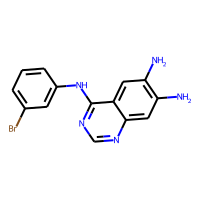

In [13]:
project1.Ligand()

All of this information and some other properties are also stored separately as instance attributes.

For example, the ligand's identifiers:

In [14]:
project1.Ligand.iupac_name
# NBVAL_CHECK_OUTPUT

'4-N-(3-bromophenyl)quinazoline-4,6,7-triamine'

In [15]:
project1.Ligand.cid
# NBVAL_CHECK_OUTPUT

'2426'

Or some of its physiochemical properties:

In [16]:
project1.Ligand.mol_weight
# NBVAL_CHECK_OUTPUT

330.189

<details>

<summary> Click here for additional information and details of other useful functions </summary> 

We have also implemented some functions as methods for the **Ligand** class. For example, the ***remove_counterion*** method can be used to remove the counter-ion of salt compounds from the main molecule in the SMILES. Calling this method will simply return the modified SMILES. In the case of our ligand, which is not charged and does not have a counter-ion, the original SMILES is returned: 
```python
project1.Ligand.remove_counterion()
```
This is necessary for the docking process as _Smina_ can have problems processing PDBQT files of salt compounds. 
    
</details>

<a id='Binding-site-detection'></a>

### [Binding site detection](#Contents-in-Practical)

Now that the processing of all input data is completed, we can begin the binding site detection process. This is carried out by the `BindingSiteDetection` class of the pipeline, which automatically runs all the required processes based on the specifications in the input data, and stores the results (e.g. coordinates of the most suitable binding site) as instance attributes in the instantiated object. 

In the input CSV file, you'll notice that the user has the option to select between three definition methods for the binding site:

1. `coordinates`: The user must specify the coordinates of the binding site. In this case, there is no need for binding site detection. 
2. `ligand`: The user should specify the ID of a co-crystallized ligand in the protein structure. This will then be used here to define the binding site. 
3. `detection`: The user should specify a **detection method**. 

For this talktorial, we use the *DoGSiteScorer* functionality of the [*ProteinsPlus*](https://proteins.plus) webserver as our detection method. The functions required for communication with the *DoGSiteScorer* webserver's API are implemented in the `DoGSiteScorer` helper module (for a demonstration of each function, see the <a href="#dogsitescorer_demo">corresponding section</a> in *Supplementary Information*).

We can now instantiate the `BindingSiteDetection` class using 

* the `Protein` object, 
* the `Specs.BindingSite` object, 
* and the binding site output path of our project. 

In [ ]:
from utils import BindingSiteDetection

project1.BindingSiteDetection = BindingSiteDetection(
    project1.Protein,
    project1.Specs.BindingSite,
    project1.Specs.OutputPaths.binding_site_detection,
)

All intermediate information leading to the selected binding-pocket's coordinates is now stored in the `BindingSiteDetection` instance of our project.

For example, a dataframe containing all retrieved information on all detected binding sites:

In [ ]:
project1.BindingSiteDetection.dogsitescorer_binding_sites_df.head()
# NBVAL_CHECK_OUTPUT

The name of the selected binding site:

In [ ]:
project1.BindingSiteDetection.best_binding_site_name
# NBVAL_CHECK_OUTPUT

We can also visualize the selected binding pocket (or any other pocket by providing its name; e.g. `project1.BindingSiteDetection.visualize("P_0")`):

In [ ]:
project1.BindingSiteDetection.visualize_best()

Most importantly, the coordinates of the selected binding site are also assigned to the `Protein` object in the project:

In [ ]:
project1.Protein.binding_site_coordinates
# NBVAL_CHECK_OUTPUT

<a id='Ligand-similarity-search'></a>

### [Ligand similarity search](#Contents-in-Practical)

With the coordinates of the protein's binding site in hand, we now focus on the ligand similarity-search part of the pipeline. This is implemented in the `LigandSimilaritySearch` class, which takes in the `Ligand` object and the `Specs.LigandSimilaritySearch` object of the pipeline and initializes a similarity search using the *PubChem* webserver with the help of functions implemented in the `PubChem` helper module. Several drug-likeness scores are then automatically calculated for each of the analogs retrieved. Using these scores, a given number (specified in the input file) of most drug-like analogs are selected and used to create `Ligand` objects with the help of the `Ligand` class that we used earlier. These are assigned as an instance attribute to the `LigandSimilaritySearch` class as well as the input `Ligand` object.

<details>

<summary> Click here for additional information about the drug-likeness scores </summary> 

`drug_score_total` is calculated as a weighted average of the following three drug-likeness scores, with a ratio of 3:2:1, respectively:

* Quantitative Estimate of Drug-likeness (QED) calculated by RDKit using default parameters
* QED calculated by implementing functions that fit experimental data from Bickerton et al. (2012) (see references)
* Lipinski's rule of 5 (normalized, i.e. 4 = 1, 3 = 0.75, 2 = 0.5, 1 = 0.25, 0 = 0)
</details>

We instantiate the class and assign it to our project (*Note*: For this project, this process will take **about 2 minutes** to complete):

In [17]:
# TODO remove again; only for CI testing
from utils.helpers import obabel

obabel.create_pdbqt_from_smiles("Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N", Path(".") / "ligand.pdbqt")

In [18]:
from utils import LigandSimilaritySearch

project1.LigandSimilaritySearch = LigandSimilaritySearch(
    project1.Ligand,
    project1.Specs.LigandSimilaritySearch,
    project1.Specs.OutputPaths.similarity_search,
    frozen_data_filepath=frozen_data_project1.pubchem_similarity_search,
)

Now, we can view the full list of all fetched analogs, their calculated physiochemical properties and drug-likeness scores. 

In [19]:
project1.LigandSimilaritySearch.all_analogs.shape

(30, 14)

,CanonicalSMILES,Mol,dice_similarity,mol_weight,num_H_acceptors,num_H_donors,logp,tpsa,num_rot_bonds,saturation,drug_score_qed,drug_score_lipinski,drug_score_custom,drug_score_total
CID,,,,,,,,,,,,,,
84759,C1=CC=C2C(=C1)C(=NC=N2)N,,0.46,145.165,3,1,1.21,51.80,0,0.00,0.61,1.0,0.64,0.68
62274,CC1=CC2=C(C=CC=N2)C3=C1N(C(=N3)N)C,,0.34,212.256,4,1,2.01,56.73,0,0.17,0.62,1.0,0.70,0.71
7019,C1=CC=C2C(=C1)C(=C3C=CC=CC3=N2)N,,0.33,194.237,2,1,2.97,38.91,0,0.00,0.56,1.0,0.63,0.66
62389,C1=CC=C(C=C1)CNC2=NC=NC3=C2NC=N3,,0.32,225.255,4,2,1.96,66.49,3,0.08,0.71,1.0,0.76,0.78
10288191,CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)F)C(=O...,,0.30,441.232,6,3,3.01,88.41,6,0.18,0.40,1.0,0.54,0.55

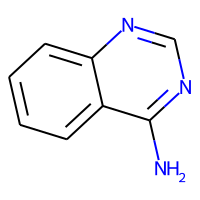
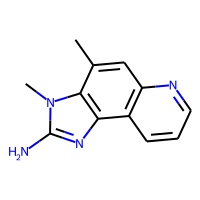
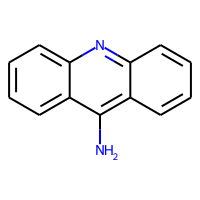
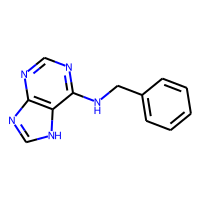
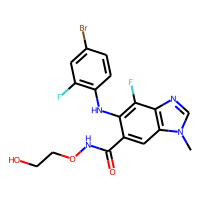

In [20]:
project1.LigandSimilaritySearch.all_analogs.head()

From these analogs, a certain number of most drug-like compounds are selected according to the input specifications.  These selected analogs are then turned into `Ligand` objects and assigned to the input `Ligand` under the attribute name `analogs`: 

In [21]:
project1.Ligand.analogs
# NBVAL_CHECK_OUTPUT

{'65997': <Ligand CID: 65997>,
 '2435': <Ligand CID: 2435>,
 '57469': <Ligand CID: 57469>,
 '5011': <Ligand CID: 5011>,
 '62389': <Ligand CID: 62389>,
 '11292933': <Ligand CID: 11292933>,
 '214347': <Ligand CID: 214347>,
 '1530': <Ligand CID: 1530>,
 '11256587': <Ligand CID: 11256587>,
 '1935': <Ligand CID: 1935>,
 '62274': <Ligand CID: 62274>,
 '53462': <Ligand CID: 53462>,
 '84759': <Ligand CID: 84759>,
 '62275': <Ligand CID: 62275>,
 '6451164': <Ligand CID: 6451164>,
 '103148': <Ligand CID: 103148>,
 '7019': <Ligand CID: 7019>,
 '62805': <Ligand CID: 62805>,
 '675': <Ligand CID: 675>,
 '5546': <Ligand CID: 5546>}

The list contains `Ligand` objects corresponding to each analog found. Each analog has thus its own attributes and methods, just like our input `Ligand`, which can be accessed separately via the analog's CID. For example:

In [22]:
project1.Ligand.analogs["65997"]
# NBVAL_CHECK_OUTPUT

<Ligand CID: 65997>

Value
Structure                                          Property                                                              
<img data-content="rdkit/molecule" src="data:im... name                                                        Lerisetron
                                                   iupac_name                      1-benzyl-2-piperazin-1-ylbenzimidazole
                                                   smiles                         C1CN(CCN1)C2=NC3=CC=CC=C3N2CC4=CC=CC=C4
                                                   cid                                                              65997
                                                   inchi                InChI=1S/C18H20N4/c1-2-6-15(7-3-1)14-22-17-9-5...
                                                   inchikey                                   PWWDCRQZITYKDV-UHFFFAOYSA-N
                                                   mol_weight                                                     292.386
                                                   num_H_acceptors                                                      4
                                                   num_H_donors                                                         1
                                                   logp                                                              2.49
                                                   tpsa                                                             33.09
                                                   num_rot_bonds                                                        3
                                                   saturation                                                        0.28
                                                   drug_score_qed                                                     0.8
                                                   drug_score_lipinski                                                1.0
                                                   drug_score_custom                                                 0.81
                                                   drug_score_total                                                  0.84
                                                   similarity                                                        0.19
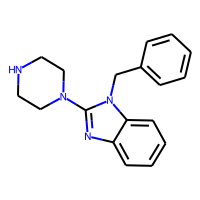

In [23]:
project1.Ligand.analogs["65997"]()

<a id='Molecular-docking'></a>

### [Molecular docking](#Contents-in-Practical)

We now have successfully 

* defined the binding site of our input protein 
* and found a list of analogs for our input ligand. 

The next step in the pipeline is to perform docking calculations on the protein binding site using the ligand analogs. This is done automatically by the `Docking` class of the pipeline, which docks all provided analogs onto the protein and stores the results separately for each docking pose. Other meaningful information are also extracted from the results of all docking poses for each analog and stored separately.

We instantiate the `Docking` class with 

* the `Protein` object containing the binding site coordinates, 
* the list of analogs (as `Ligand` objects)
* and the `Specs.Docking` object of the project. 

*Note*: This is the most computationally intense process of the pipeline and will take **5 to 10 minutes** (for 20 ligands) to complete.

In [ ]:
from utils import Docking

project1.Docking = Docking(
    project1.Protein,
    list(project1.Ligand.analogs.values()),
    project1.Specs.Docking,
    project1.Specs.OutputPaths.docking,
    frozen_data_filepath=frozen_data_project1.docking_pdbqt_files
)

We can now view all the calculated docking results for each docking pose of each analog: 

In [ ]:
project1.Docking.results_dataframe.sort_values(by="affinity[kcal/mol]").head()
# NBVAL_CHECK_OUTPUT

From the docking output we obtain ```affinity```, which is the estimated binding affinity from the docking score, and calculations of pose distances from the best predicted binding mode matched using different methods (```best mode_rmsd_l.b``` and ```best mode_rmsd_u.b```).

<details>

<summary> Click here for additional information about the Smina output </summary> 

From the [Vina manual](http://vina.scripps.edu/manual.html):

RMSD values are calculated relative to the best mode and use only movable heavy atoms. Two variants of RMSD metrics are provided, rmsd/lb (RMSD lower bound) and rmsd/ub (RMSD upper bound), differing in how the atoms are matched in the distance calculation:

* $rmsd/ub$ (upper bound) matches each atom in one conformation with itself in the other conformation, ignoring any symmetry
* $rmsd/lb$ (lower bound)is defined as follows: $rmsd/lb(c1, c2) = max(rmsd'(c1, c2), rmsd'(c2, c1))$, i.e. a match between each atom in one conformation with the *closest* atom of the same element type in the other conformation.
</details>

Alternatively, by accessing a specific analog, we can view the full results for that analog using the attribute `dataframe_docking`:

In [ ]:
project1.Ligand.analogs["11292933"].dataframe_docking
# NBVAL_CHECK_OUTPUT

A summary of the docking results (e.g. highest/mean binding affinities) are also added to the main dataframe of each analog and can be viewed by calling its object.     

In [ ]:
project1.Ligand.analogs["11292933"]().tail(7)

The same summary results are also added as instance attributes for each object:
    

In [ ]:
project1.Ligand.analogs["11292933"].binding_affinity_best
# NBVAL_CHECK_OUTPUT

The `NGLView` helper module provides additional methods to the `Docking` class for visualization of the docking poses. For example, we can view all poses together in an interactive way using the `visualize_all_poses` method. In this method, poses are sorted by their binding affinities and labeled by their CID and corresponding pose number. By selecting an analog from the menu below, the viewer automatically shows the protein residues in close proximity (i.e. 6 Å) of the ligand, as well as its corresponding binding affinity.

Also if we are interested in visualization of a certain analog's docking poses, we can use the `visualize_analog_poses` method instead, and provide the analog's CID.

**Note: Clicking through different ligands and docking poses works only when you execute this talktorial; it does not work on the website version of the talktorial.**

In [ ]:
project1.Docking.visualize_all_poses()

Now let's separately dock the input ligand in order to be able to compare the results later and see how the analogs compare to the starting ligand.
    

In [ ]:
project1.Ligand.Docking = Docking(
    project1.Protein,
    [project1.Ligand],
    project1.Specs.Docking,
    project1.Specs.OutputPaths.ligand,
    frozen_data_filepath=frozen_data_project1.docking_pdbqt_files
)

Similar to the analogs, the docking results of the input ligand is also stored in its object. 

For example, to see the docking dataframe:
   

In [ ]:
project1.Ligand.dataframe_docking
# NBVAL_CHECK_OUTPUT

<a id='Analysis-of-protein–ligand-interactions'></a>

### [Analysis of protein–ligand interactions](#Contents-in-Practical)

With the docked poses of each analog in hand, we can now focus on analyzing the protein-ligand interactions in each docking pose of each analog. For the analysis, we use the `PLIP` package, for which a helper module is defined. This is then used in the `InteractionAnalysis` class of the pipeline, which automatically calculates all interaction information for each docked pose of each ligand. 

The `InteractionAnalysis` class can be instantiated by providing 

* the filepaths of the separated protein structure, 
* the smallest residue number in the protein,
* a list of all analogs (as `Ligand` objects), 
* the results dataframe of the docking process,
* the `Specs.InteractionAnalysis` object of the project,
* and the output path for storing the interaction analysis data.

In [ ]:
from utils import InteractionAnalysis

project1.InteractionAnalysis = InteractionAnalysis(
    project1.Docking.pdbqt_filepath_extracted_protein,
    project1.Docking.pdb_filepath_extracted_protein,
    project1.Protein.residue_number_first,
    list(project1.Ligand.analogs.values()),
    project1.Docking.master_df,
    project1.Specs.InteractionAnalysis,
    project1.Specs.OutputPaths.interaction_analysis,
)

The interactions can now be inspected collectively for all docking poses of all analogs. Here, only the number of interactions are recorded for each interaction type:

In [ ]:
project1.InteractionAnalysis.results.sort_values(
    by="total_num_interactions", ascending=False
).head()
# NBVAL_CHECK_OUTPUT

If we are interested in the details of a specific interaction type for a specific docking pose, we can access this information from the corresponding `Ligand` object of the analog. 
    
For example, accessing the data for hydrophobic interactions of the first docking pose for analog 65997 (showing only the 5 first entries):   

In [ ]:
project1.Ligand.analogs["11292933"].docking_pose_1_interactions_hydrophobic.head()
# NBVAL_CHECK_OUTPUT

Or hydrogen-bond interactions of the second docking pose for analog 11292933:    

In [ ]:
project1.Ligand.analogs["11292933"].docking_pose_2_interactions_h_bond.head()
# NBVAL_CHECK_OUTPUT

Again, a summary of interaction analysis data is also added to each analog's main dataframe, which can be viewed by calling the object. Here showing only the relevant data, i.e. the last 9 rows:
    

In [ ]:
project1.Ligand.analogs["11292933"]().tail(9)

Let's use `plot_interaction_affinity_correlation` function and see if there is any visible correlation between the calculated binding affinities and the number of interactions for each docking pose:
    

In [ ]:
project1.InteractionAnalysis.plot_interaction_affinity_correlation()

No obvious correlation is visible between the two sets of data; The number of total interactions is weakly correlated with the binding affinity, albeit with several outliers.

Now let's also analyze the interactions in the docking poses of the input ligand for comparison:    

In [ ]:
project1.Ligand.InteractionAnalysis = InteractionAnalysis(
    project1.Docking.pdbqt_filepath_extracted_protein,
    project1.Docking.pdb_filepath_extracted_protein,
    project1.Protein.residue_number_first,
    [project1.Ligand],
    project1.Ligand.Docking.master_df,
    project1.Specs.InteractionAnalysis,
    project1.Specs.OutputPaths.ligand,
)

The results can be viewed in a similar way to the analogs. For example, to view the summary data:    

In [ ]:
project1.Ligand.InteractionAnalysis.results.sort_values(
    by="total_num_interactions", ascending=False
)
# NBVAL_CHECK_OUTPUT

#### Visual interaction analysis

We have additional methods available in the `InteractionAnalysis` class for visualization of the protein-ligand interactions. For example, we can now view the interactions for all docking poses in an interactive way. By selecting each docking pose (labeled by their CID and mode-number and sorted by their binding affinities), all the interacting residues are shown. The interactions are visualized with colored lines for which a color-map is also provided.

If we are interested in visualization of a certain analog's interactions, we can use the `visualize_analog_interactions` method instead, and provide the analog's CID.


**Note: Clicking through different ligands and docking poses works only when you execute this talktorial; it does not work on the website version of the talktorial.**

In [ ]:
project1.InteractionAnalysis.visualize_all_interactions()

#### Finding poses with specific interactions

We can also search for docked poses displaying a specific set of interactions with specific residues of the protein using the `find_poses_with_specific_interactions` method. This returns a list of tuples, where the first tuple element is the CID, and the second element is its corresponding docking pose number in which the specified interaction exists.

For example, since it's a common interaction in many EGFR inhibitors, we can search for the ligands that are involved in hydrogen-bonding with the hinge region (in this case residue M793) of the protein: 

In [ ]:
desired_interactions = project1.InteractionAnalysis.find_poses_with_specific_interactions(
    [["h_bond", 790]], "any"
)
desired_interactions
# NBVAL_CHECK_OUTPUT

And we can also visualize the results separately instead of looking for them in the menu of the viewer above.    

In [ ]:
project1.InteractionAnalysis.visualize_docking_poses_interactions(desired_interactions)

<a id='Selection-of-the-best-optimized-ligand'></a>

### [Selection of the best optimized ligand](#Contents-in-Practical)

At this point, we have carried out all the processes in the pipeline and have gathered all the information in our `LeadOptimizationPipeline` instance, i.e. `project1`. 

To recap, we have

* found the most suitable binding site in the input protein based on the specifications of our project,
* gathered a number of analogs to the input ligand and filtered them to choose those with the highest drug-likeness scores, and
* calculated several docking poses and corresponding binding affinities for each analog and analyzed their interactions with the protein. 

Now we import a class, `OptimizedLigands`, which takes in the whole project, and based on the specifications in the input file, selects the best analog. 

In [ ]:
from utils import OptimizedLigands

project1.OptimizedLigands = OptimizedLigands(project1)

The class has a `__call__` method, which prints out a summary:    

In [ ]:
project1.OptimizedLigands()

We can see that the pipeline successfully found an analog superior to the input ligand in all of the three metrics, i.e. drug-likeness, estimated binding affinity, and total number of protein-ligand interactions.  

Lastly we can simply visualize the most suited analog(s) found:

In [ ]:
project1.OptimizedLigands.show_final_output()

The final output of the pipeline is thus a certain number (specified in the input specifications) of `Ligand` objects corresponding to the optimized analogs found:

In [ ]:
project1.OptimizedLigands.output
# NBVAL_CHECK_OUTPUT

In [ ]:
[ligand.binding_affinity_best for ligand in project1.OptimizedLigands.output]
# NBVAL_CHECK_OUTPUT

<a id='Putting-all-the-pieces-together:-A-fully-automated-pipeline'></a>

### [Putting all the pieces together: A fully automated pipeline](#Contents-in-Practical)

Now that we have implemented all the necessary parts of our pipeline, we can write a method &mdash;`LeadOptimizationPipeline.run` &mdash; to automatically run the whole pipeline and display the results; it takes in the project name, the filepath of the input data, and the output path, and performs all the necessary processes to generate the final output. It will also print a summary of the intermediate results for each part of the pipeline, so that the process can be followed.

For this demonstration, let's use the optimized ligand we just found as the input ligand to see whether we can do better than our previous optimization results and obtain a better analog. 

We first need to create the corresponding input file. To do so, we can simply open the input file of our project, modify the ligand input value, and save the file as a new input file:

In [ ]:
new_input_df = pd.read_csv(project1.Specs.RawData.filepath)
new_input_df.head()
# NBVAL_CHECK_OUTPUT

In [ ]:
new_input_df.loc[3, "Value"] = project1.OptimizedLigands.output[0].smiles
new_input_df
# NBVAL_CHECK_OUTPUT

In [ ]:
new_input_df.to_csv(DATA / "PipelineInputData_Project2.csv")

Now let's run the pipeline again, this time fully automated and with the already optimized ligand. Other than printing out a short summary of results in real-time, the function also returns the whole project at the end. Thus, by assigning the return value to a variable (here `project2`), we can later further investigate the information generated by the pipeline in more detail.

In [ ]:
project2 = LeadOptimizationPipeline.run(
    "Project2_EGFR_CID11292933",
    input_data_filepath=DATA / "PipelineInputData_Project2.csv",
    output_data_root_folder_path=DATA / "Outputs",
    frozen_data_filepath=frozen_data_project2.pipeline
)

In [ ]:
project2.OptimizedLigands.output
# NBVAL_CHECK_OUTPUT

In [ ]:
[ligand.binding_affinity_best for ligand in project2.OptimizedLigands.output]
# NBVAL_CHECK_OUTPUT

<a id='discussion'></a>

## Discussion

In this talktorial, we successfully implemented a fully-automated virtual screening pipeline targeted at hit-expansion and lead-optimization phases of a drug discovery project, and demonstrated it using EGFR (PDB code: 3W32) as the target protein and a promising inhibitor with the ChEMBL compound ID CHEMBL328216. 

* As the input, the pipeline accepted a single CSV data file, specifying a protein structure, a ligand and several other settings regarding the different processes of the pipeline. 
* It then performed all the necessary processes in order to suggest an analog of the provided ligand with promising features in terms of estimated binding affinity, number of protein-ligand interactions and drug-likeness. 

The code is specifically structured in such a way that it will be easy to digest, maintain, and expand. For each functionality of the pipeline, a separate class was created, using several helper modules that are required to develop a certain part of the pipeline, and *can be easily adopted for other projects*. 

<details>

<summary> Click here for a more detailed summary of the process </summary>

The pipeline was contained in a single class (`LeadOptimizationPipeline`) with sub-classes for every process, making for easier access to all parts of the data generated. 
    
* The process began with **binding site detection** using the *DoGSiteScorer* functionality of the *ProteinsPlus* webserver. 
* The next step was a **ligand similarity-search** performed using the *PubChem* web-services via the provided API backend. 
* Subsequently, the structural analogs detected via the similarity search were filtered based on their physiochemical properties in order to *select the most drug-like analogs*. 
* These were assessed in a virtual screening process using the *Smina* program in order to estimate their binding affinities and corresponding binding-poses.
* Using the *PLIP* package, these generated docking poses were analyzed in terms of their specific non-covalent interactions with the target protein and analogs displaying a specific set of desired interactions were selected in order to achieve higher selectivities for the target protein. 
* After all required processes were carried out, the pipeline outputted a given number of optimized analogs, based on the criteria defined by the user in the input data, such as binding affinity, physiochemical and pharmacokinetic properties, and specific interactions with the protein structure.  
    
    
Furthermore, at the end of the pipeline a function was provided (`LeadOptimizationPipeline.run`) that put the whole program together and automatically ran a given project to completion, merely by providing an input specification file. This function was demonstrated by using the optimized analog found at the end of the step-by-step introduction of the pipeline, which led to discovering a second analog with a higher estimated binding affinity than the first one.
</details>

As the pipeline provides functionalities and options outside the scope of this talktorial, we have also provided a *Supplementary Information* section that showcases the possibilities of the pipeline in more detail. Furthermore, we have structured the code to be easily expandable, so it can be freely adopted and built upon for various situations and needs. The results of the pipeline are not, however, fully deterministic. Several calculations (e.g. generating 3D structures for docking) have randomized components during the course of their execution. Therefore, re-running the pipeline under the same conditions may result in slightly different outputs. 

![Pipeline input and output](images/pipeline_io.png)  

*Figure 9.* Results of the pipeline's performance in the demonstrated examples. Starting with a ligand with an estimated binding affinity of -8.8 kcal/mol, the pipeline was able to suggest a ligand with an improved estimated affinity of -10.2 kcal/mol. Subjecting this optimized ligand to the same process resulted in an analog with an estimated binding affinity of -10.8 kcal/mol.

<a id='quiz'></a>

## Quiz

**Conceptual Questions:**

1. Describe the processes involved in the hit-to-lead and lead optimization phases of a drug design pipeline. How are these processes implemented in the virtual pipeline described in this talktorial?
2. Describe the important facets of binding site definition in a general virtual screening pipeline. What options are available for binding site definition and selection in this pipeline? 
3. What chemical differences for obtained analogs might explain their lower calculated similarity than the threshold specified in the input data?
4. What did the interaction analysis data tell us about selecting an analog with higher selectivity for the target protein?

**Exercises:**

1. In order to prevent the talktorial from being too lengthy, we only demonstrated a sub-set of the options and information that the pipeline offers. By creatin another `LeadOptimizationPipeline` instance, execute the pipeline and explore its other options by looking up the attributes and methods of different classes comprising the pipeline.   
2. Try to implement a loop, where the final output of a pipeline is re-entered as the input for a new pipeline (i.e. try to optimize your initial input ligand through several runs, same as we did for the demonstration of the `LeadOptimizationPipeline.run` function). After how many cycles does the pipeline reach a plateau where results no longer improve?
3. Generate your own input CSV-files, each time choosing a different set of specifications, and compare the results. Can you find a set of specifications that perform considerably better than the others?

<a id='supp'></a>

## Supplementary information
 
Here we will also demonstrate the functions of each helper module used in the pipeline, to provide a better understanding of the inner workings of the code. 

*Note*: Some cells use variables defined in an early cell. Therefore, in order for all cells to work you have to run them sequentially.

<a id='io_demo'></a>

### Demonstration of the `io` helper module

Using this module, the input CSV file can be easily imported via the `create_dataframe_from_csv_input_file` function, by specifying the corresponding filepath, the name of the columns to be used as indices for the dataframe, and the name of the other columns we want to keep:

In [ ]:
from utils import Consts
from utils.helpers import io

example_input_df = io.create_dataframe_from_csv_input_file(
    input_data_filepath=DATA / f"PipelineInputData_Project1.csv",
    list_of_index_column_names=[
        Consts.DataFrame.ColumnNames.SUBJECT.value,
        Consts.DataFrame.ColumnNames.PROPERTY.value,
    ],
    list_of_columns_to_keep=[Consts.DataFrame.ColumnNames.VALUE.value],
)

Note that for inputting the `list_of_index_column_names` and `list_of_column_names_to_keep` we didn't write the name of the columns (i.e. `"Subject"`, `"Property"` and `"Value"`) explicitly but used the respective constants stored in the `Consts` class. In this way, if the column names in the input file are changed in the future, they only need to be corrected in the `Consts` class and nowhere else in the code.

We can now view the imported data in its entirety:    

In [ ]:
example_input_df
# NBVAL_CHECK_OUTPUT

Moreover, we can also extract all the data corresponding to a specific `Subject`, using the `copy_series_from_dataframe` function and specifying the main dataframe and the name of the index-level and column that we want to extract. For example, to extract the binding site specification data:

In [ ]:
example_input_protein_data = io.copy_series_from_dataframe(
    input_df=example_input_df,
    index_name=Consts.DataFrame.SubjectNames.BINDING_SITE.value,
    column_name=Consts.DataFrame.ColumnNames.VALUE.value,
)

# Displaying the extracted data:
example_input_protein_data
# NBVAL_CHECK_OUTPUT

Later, for storing the output data we will also need the `create_folder` function, which can create a folder (and all its necessary parent folders) with a given name at a given path. The function then returns the full path of the created folder. We now create a folder named *Examples*, which we will use to store the files used in the demonstration sections.

In [ ]:
example_output_path = io.create_folder(folder_name="Examples", folder_path=DATA / f"Outputs")

# Displaying the full path of the generated folder:
example_output_path

<a id='pdb_demo'></a>

### Demonstration of the `pdb` helper module

We can use the `fetch_and_save_pdb_file` function to download a protein's PDB file using its PDB-code. The function takes in a full filepath, including the name of the file and returns the full filepath (including the .PDB extension).

In [ ]:
from utils.helpers import pdb

example_downloaded_protein_filepath = pdb.fetch_and_save_pdb_file(
    pdb_code="3w32", output_filepath=example_output_path / "3W32"
)

example_downloaded_protein_filepath


The PDB file is now downloaded on the disk. Now, the content of the PDB file can be obtained as follows (As the complete file is very long, here we only show the first 800 characters):    

In [ ]:
example_pdb_file_content = pdb.read_pdb_file_content(
    input_type="pdb_filepath", input_value=example_downloaded_protein_filepath
)

example_pdb_file_content[:800]
# NBVAL_CHECK_OUTPUT

Note that, alternatively, we also could have set the `input_type` to `"pdb_code"` and entered a valid PDB-code as the `input_value` to directly fetch and read the file contents of a protein PDB file from the PDB webserver. However, in that case, the PDB file itself would not have been saved on the disk.

This file content can the be used to extract some useful information from the PDB file:

In [ ]:
pdb.extract_info_from_pdb_file_content(example_pdb_file_content)
# NBVAL_CHECK_OUTPUT

Or directly without storing the PDB file content in a variable (here using another PDB-code as example):

In [ ]:
pdb.extract_info_from_pdb_file_content(
    pdb_file_text_content=pdb.read_pdb_file_content(input_type="pdb_code", input_value="5gty")
)
# NBVAL_CHECK_OUTPUT

The `load_pdb_file_as_dataframe` function can also be used but it does not contain all the information that the `extract_info_from_pdb_file_content` can extract. The function returns a dictionary where each value is a *Pandas DataFrame*:

In [ ]:
example_pdb_dataframe = pdb.load_pdb_file_as_dataframe(example_pdb_file_content)
example_pdb_dataframe.keys()
# NBVAL_CHECK_OUTPUT

For example, all the information regarding the atoms in the protein can be accessed via the `ATOM` key. This data was used in the pipeline, for example, to extract the range of residue numbers of the protein.

In [ ]:
example_pdb_dataframe["ATOM"].head()
# NBVAL_CHECK_OUTPUT

<a id='pubchem_demo'></a>

### Demonstration of the `pubchem` helper module

The `convert_compound_identifier` function can be used to get a specific compound's identifier by providing another identifier. 
    
For example, obtaining the SMILES of Aspirin by providing its name:

In [ ]:
from utils.helpers import pubchem

pubchem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="smiles"
)
# NBVAL_CHECK_OUTPUT

Or retrieving its IUPAC name:

In [ ]:
pubchem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="iupac_name"
)
# NBVAL_CHECK_OUTPUT

Or retrieving its name using its SMILES:

In [ ]:
pubchem.convert_compound_identifier(
    input_id_type="smiles",
    input_id_value="CC(=O)OC1=CC=CC=C1C(=O)O",
    output_id_type="name",
)
# NBVAL_CHECK_OUTPUT

Or retrieving its CID using its name:

In [ ]:
pubchem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="cid"
)
# NBVAL_CHECK_OUTPUT

Using the `get_compound_record` function, all available records on the molecule can be obtained in a dictionary with the following keys: `"id"`, `"atoms"`, `"bonds"`, `"coords"`, `"charge"`, `"props"`, `"count"`.

As an example, we access the `"props"` key, which contains the physiochemical properties of the compound (only showing the first 2 entries, since the full list is too long):

In [ ]:
pubchem.get_compound_record(input_id_type="name", input_id_value="aspirin")["props"][:2]
# NBVAL_CHECK_OUTPUT

The `get_description_from_smiles` function provides a textual description of the compound. However, it is not available for every compound. If the parameter `printout` is set to False, the function will return a dictionary containing the descriptions, sources, and other information. By setting it to True, only the description part will be printed out. For example, for aspirin:

In [ ]:
pubchem.get_description_from_smiles(smiles="CC(=O)OC1=CC=CC=C1C(=O)O", printout=True)
# NBVAL_CHECK_OUTPUT

The ```similarity_search``` function performs a similarity search on a given compound by providing its SMILES. The ```min_similarity``` parameters defines the minimum similarity percent to be considered, while the ```max_num_results``` parameters limits the number of results to be fetched from the PubChem server. By default, the results are returned in a ```json``` format, which is transformed into a list of dictionaries. However, the return format can also be changed using the optional ```output_data_file``` parameter.

In [ ]:
pubchem.similarity_search(
    smiles="C1=CC(=CC(=C1)Br)NC2=NC=NC3=CC(=C(C=C32)N)N", min_similarity=70, max_num_results=30
)

<a id='rdkit_demo'></a>

### Demonstration of the `rdkit` helper module

To use any other function in the `rdkit` module, we first have to generate an RDKit molecule object using the `create_molecule_object` function. This can accept different identifiers as input such as the SMILES. Here we again use Aspirin as an example:

In [ ]:
from utils.helpers import rdkit

example_mol_obj = rdkit.create_molecule_object(
    input_type="smiles", input_value="CC(=O)OC1=CC=CC=C1C(=O)O"
)

The RDKit molecule objects can be called directly, which simply visualizes the molecule:

In [ ]:
example_mol_obj

The `calculate_druglikeness` function can then be used to calculate several molecular properties and drug-likeness scores, which will be returned as a dictionary:

In [ ]:
rdkit.calculate_druglikeness(mol_obj=example_mol_obj)
# NBVAL_CHECK_OUTPUT

The `calculate_similarity_dice` function is used to calculate the Dice similarity metric between two ligands using a 4096-bit Morgan fingerprints with a raidus of 2. Here, as an example we will input the same molecule twice which results in a similarity score of 1 (i.e. 100% similarity): 

In [ ]:
rdkit.calculate_similarity_dice(mol_obj1=example_mol_obj, mol_obj2=example_mol_obj)
# NBVAL_CHECK_OUTPUT

Using the `save_molecule_image_to_file` function, an image file containing the ligand's structure can be saved at a given path as well:

In [ ]:
rdkit.save_molecule_image_to_file(
    mol_obj=example_mol_obj, filepath=example_output_path / "aspirin"
)

In addition, we can use the `save_3D_molecule_to_SDfile` function which prepares the molecule for docking calcluations i.e. adds hydrogen atoms, creates 3D conformation and runs energy minimizations etc. It is then saved as an SDF file:

In [ ]:
rdkit.save_3D_molecule_to_SDfile(mol_obj=example_mol_obj, filepath=example_output_path / "aspirin")

<a id='obabel_demo'></a>

### Demonstration of the `obabel` helper module

We can use the `obabel` module to create PDBQT files from PDB files and SMILES.

In [ ]:
from utils.helpers import obabel

In [ ]:
obabel.create_pdbqt_from_pdb_file(example_output_path / "3W32.pdb", example_output_path / "protein.pdbqt")

In [ ]:
obabel.create_pdbqt_from_smiles("Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N", example_output_path / "ligand.pdbqt")

<a id='dogsitescorer_demo'></a>

### Demonstration of the `dogsitescorer` helper module

If we want to detect the binding sites of a protein from a local PDB file, we should first upload the file to the *DogSiteScorer* webserver using the `upload_pdb_file` function. For this, we will use the PDB file we downloaded earlier:

In [ ]:
from utils.helpers import dogsitescorer

example_dummy_pdb_id = dogsitescorer.upload_pdb_file(filepath=example_downloaded_protein_filepath)

example_dummy_pdb_id
# NBVAL_CHECK_OUTPUT

The `upload_pdb_file` returns a dummy PDB-code for the uploaded structure which can be used in place of a valid PDB-code to submit a binding site detection job. Notice that the `submit_job` function can also take in a chain-ID to limit the detection on that specific chain, and a ligand-ID to also calculate the coverage of each detected binding site. However, the ligand-ID that *DoGSiteScorer* accepts has its own format and is not the same as the ligand-ID in the protein PDB file. 

Nevertheless, it follows the following format: (ligand-ID)\_(chain-ID)\_(ligand-residue-ID). When implementing the `BindingSiteDetection` class, we will circumvent this by automatically generating the *DogSiteScorer* ligand-ID from the normal ligand-ID so that the user does not have to manually look up and enter the ligand-ID in this specific format. 

*Note*: This process should take **about one minute** to complete.

In [ ]:
example_binding_site_data = dogsitescorer.submit_job(
    pdb_id=example_dummy_pdb_id, ligand_id="W32_A_1101", chain_id="A"
)

example_binding_site_data
# NBVAL_CHECK_OUTPUT

Alternatively, we can also use a valid PDB-code to directly submit a binding site detection job: 

In [ ]:
dogsitescorer.submit_job(
    pdb_id="3W32",
    ligand_id="W32_A_1101",
    chain_id="A",
)

The `submit_job` function returns a DataFrame containing all the detected binding sites and their respective properties. It also contains the URLs of the PDB and CCP4 files for each of the detected binding sites, which can be used to download the files later. Among the calculated properties, the most important are `drugScore`, `simpleScore`, `volume`, as well as `lig_cov` and `poc_cov` for when a ligand-ID is also inputted. The list of all properties can be accessed by retrieving the column names of the DataFrame: 

In [ ]:
example_binding_site_data.columns
# NBVAL_CHECK_OUTPUT

The `simpleScore` is a simple druggability score, based on a linear combination of the three descriptors describing volume, hydrophobicity and enclosure. In addition, a subset of meaningful descriptors is incorporated in a support vector machine (libsvm) to predict a druggability score called `drugScore`, which has a value between 0 and 1. The higher the score the more druggable the binding site is estimated to be. `lig_cov` gives the percentage of the ligand volume that is covered by the binding site, and `poc_cov` gives the percentage of the binding site volume that is covered by the ligand.

Depending on the specifics of the project, these values can be used to select the most-suitable detected binding site. Here, we have implemented two possibilities for this selection process in the `select_best_pocket` function. The first option is to provide a list of properties in order of importance, based on which the binding site with the highest or lowest value is to be chosen. The function then returns the name of the selected binding site. The list of properties should be inputted as a list. For example, the `selection_criteria` argumenr below sorts the binding sites by their `lig_cov` values and if there are two or more binding sites with the same `lig_cov` value, it then sorts them by their `poc_cov` values:

In [ ]:
example_best_pocket_name = dogsitescorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="sorting",
    selection_criteria=["lig_cov", "poc_cov"],
    ascending=False,
)

example_best_pocket_name
# NBVAL_CHECK_OUTPUT

Another possibility for selecting a binding site is to provide any valid Python expression that generates a list-like object with the same length as the number of detected binding site. This Python expression is inputted as a string, so the user can directly input a Python expression in the input CSV file and it will be evaluated during the runtime.

For example, using this method we can perform any calculation on the properties in the binding site DataFrame. Note that for referring to the binding site dataframe, `df` should be used:

In [ ]:
dogsitescorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="function",
    selection_criteria="((df['lig_cov'] + df['poc_cov']) / 2) * ((df['drugScore'] + df['simpleScore']) / 2) / df['volume']",
    ascending=False,
)

For example, the above `selection_criteria` is a function that calculates the average of `lig_cov` and `poc_cov`, as well as the average of `drugScore` and `simpleScore`, multiplies the two together and then divides the result by the `volume`. The binding site that has the highest value is then chosen. If we want to have the lowest value, we can set the `ascending` parameter to False. Another example is:

In [ ]:
dogsitescorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="function",
    selection_criteria="df[['drugScore', 'simpleScore']].min(axis=1) * df[['poc_cov', 'lig_cov']].max(axis=1)",
    ascending=False,
)

The above example calculates the minimum value between `drugScore` and `simpleScore`, and multiplies the results with the maximum value between the `poc_cov` and `lig_cov`. 
    
We now want to calculate the coordinates of the selected binding site, so that we can use it in the docking process. For this, we first need to download the PDB files of the detected binding sites, using the `save_binding_sites_to_file` function:  

In [ ]:
dogsitescorer.save_binding_sites_to_file(
    binding_site_df=example_binding_site_data, output_path=example_output_path
)

Having downloaded the necessary binding site files, we can now calculate the coordinates of the selected binding site:

In [ ]:
dogsitescorer.calculate_pocket_coordinates_from_pocket_pdb_file(
    filepath=example_output_path / example_best_pocket_name
)